# Data Analisys

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
titanic_proccesed = pd.read_excel("/Users/joseignaciozamora/Desktop/Magister/Analisis de Datos/titanic/TitanicProccesed.xlsx", index_col = 0)
titanic_proccesed

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,0
1,1,1,0,38.0,1,71.2833,1
2,1,3,0,26.0,0,7.9250,0
3,1,1,0,35.0,1,53.1000,0
4,0,3,1,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,0
887,1,1,0,19.0,0,30.0000,0
888,0,3,0,39.0,1,23.4500,0
889,1,1,1,26.0,0,30.0000,1


# Cantidad de sovrevivientes
#### Hacemos un analisis de las variables que nos encontramos dentro del dataset

In [8]:
#Por ejemplo, la cantidad de sobrevivientes y su proporción del total de personas a bordo durante el accidente.

titanic_0 =titanic_proccesed[(titanic_proccesed['Survived']==0)]
titanic_0["Survived"].count()

print(f'La cantidad de sobrevivientes es de {titanic_0["Survived"].count()}, equivalente a un {round(titanic_0["Survived"].count()/titanic_proccesed["Survived"].count(), 2)}')


La cantidad de sobrevivientes es de 549, equivalente a un 0.62


,Survived,Sex,Age,SibSp,Fare,Embarked
Pclass,,,,,,
1,216,216,216,216,216,216
2,184,184,184,184,184,184
3,491,491,491,491,491,491


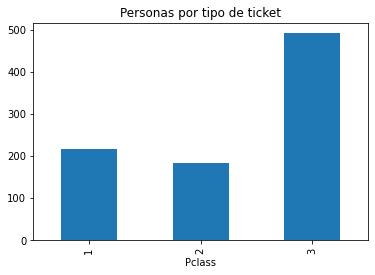

In [9]:
#Vemos la cantidad de personas en la embarcación por clase de ticket

titanic_ticket = titanic_proccesed.groupby(titanic_proccesed["Pclass"], axis= 0).count()
titanic_ticket["Survived"].plot(kind = "bar", title= "Personas por tipo de ticket")
titanic_ticket

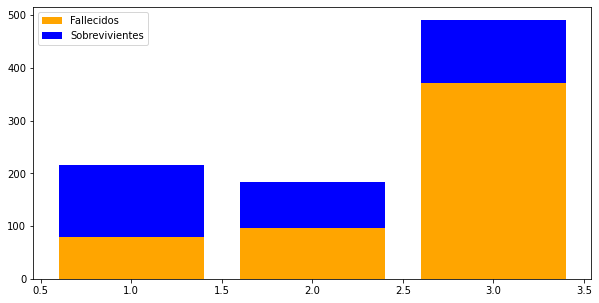

In [10]:
#Graficamos la misma información pero separada entre sobrevivientes y fallecidos durante el accidente del Titanic para cada clase de Ticket.

colores = ["orange", "blue"]
asignar = []
ticket = [1,2,3]

survived = titanic_proccesed["Survived"].values
t_0 = titanic_0 =titanic_proccesed[(titanic_proccesed['Survived']==0)].groupby(titanic_proccesed["Pclass"]).count()
t0 = t_0["Pclass"]
t_1 = titanic_1 =titanic_proccesed[(titanic_proccesed['Survived']==1)].groupby(titanic_proccesed["Pclass"]).count()
t1 = t_1["Pclass"]


plt.figure(figsize=(10,5))
plt.bar(ticket, t0, color="orange", label = "Fallecidos")
plt.bar(ticket, t1, color = "blue", bottom= t0, label = "Sobrevivientes")
plt.legend()
plt.show()

### Podemos ver que la mayor parte (Mas del 50%) de los los fallecidos son personas de 3ra clase, se posible inferir que esto se debió a que la 3ra las cabinas de tercera clase solían estar en la parte baja de la embarcación.

### Ahora realizaremos un mapa de calor vara ver la correlacion de las variables, para ello primero tokenizaremos la columna sex y Emarked.

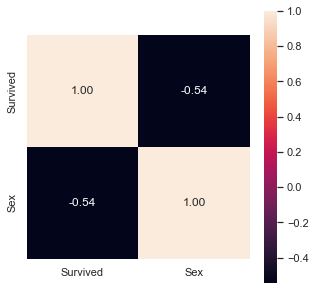

In [17]:
#Por otra parte, la variable sexo y Embarked las reemplazamos por valores.
# Para ello, creamos una función para que nos agilice la conversión en el set de prueba y entrenamiento.

def tokenizar(x):

    x['Sex'].replace('female', 0,inplace=True)
    x['Sex'].replace('male', 1,inplace=True)
    x['Embarked'].replace('S', 0,inplace=True)
    x['Embarked'].replace('C', 1,inplace=True)
    x['Embarked'].replace('Q', 2,inplace=True)
    x["Age"].fillna("39", inplace = True)
    x.dropna(inplace=True)
tokenizar(titanic_proccesed)

#Ahora realizamos un mapa de calor para mirar la correlacion que existe entre las variables Survived y Sex

correlacion = titanic_proccesed[["Survived", "Sex"]].corr(method = "pearson")
columns = correlacion.nlargest(10,'Survived').index
columns
correlacion_map = np.corrcoef(titanic_proccesed[columns].values.T)
fig, ax = plt.subplots(figsize = (5,5))
sns.set(font_scale=1.0,)
heatmap = sns.heatmap(correlacion_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()


### Vemos que la variable Sex tiene una correlación negativa, pero que quiere decir esto? Si reemplazamos los valores por 0 para mujeres y 1 para hombres?

Para ello veremos la proporcion de mujeres y hombres que sobrevivieron al desastre.

In [12]:
# Lo primero que vemos es la cantidad de mujeres y hombres a bordo del titanic al momento del desastre.

titanic_sex = titanic_proccesed.groupby("Sex").count()
titanic_sex

,Survived,Pclass,Age,SibSp,Fare,Embarked
Sex,,,,,,
0,314,314,314,314,314,314
1,577,577,577,577,577,577


In [20]:
# Agrupamos por fallecidos y sobrevivientes para tener mayor claridad en nuestra visualización.

grouptn = titanic_proccesed.groupby(["Sex", "Survived"]).size().reset_index()
grouptn = pd.DataFrame(grouptn)
groutn2 = grouptn.rename({0: "Count"}, axis = 1)
group = groutn2.replace({"Sex" :{0 :"female", 1: "male"}})
group


,Sex,Survived,Count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


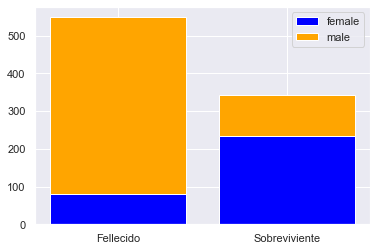

In [15]:
x_fem = group[(group["Sex"] == "female")]["Count"]

x_mal = group[(group["Sex"] == "male")]["Count"]
survive = ["Fellecido", "Sobreviviente"]
plt.bar(survive, x_fem, color = "blue", label ="female")
plt.bar(survive, x_mal, bottom= x_fem,color = "orange", label = "male")
plt.legend()
plt.show()

## Con este ultimo grafico nos queda mucho mas claro lo que el heatmap nos indica, la correlación se ve negativa por que los valores female son = 0, por lo tanto, solo interpretó como sobreviviente a los males = 1. 
### De todas maneras nos permitió seguir adelante con nuestro analisis y detectar este patrón, que a pesar de que habia mucho menos mujeres que hombres en la embarcación, sobrevivieron el doble, esto pudo deberse a que el plan de emergencia priorizó la evaciuación de niños y mujeres.